In [8]:
import os
import sys
sys.path.insert(0, os.path.abspath('../my_pkgs'))


import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from plot_pkg.plot_utils import plot_decision_regions
import matplotlib.pyplot as plt

from sklearn import tree


In [9]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_test_std = scaler.transform(X_test)
X_train_std = scaler.transform(X_train)
X_combined_std = np.vstack((X_test_std, X_train_std))

y_combined = np.hstack((y_test, y_train))

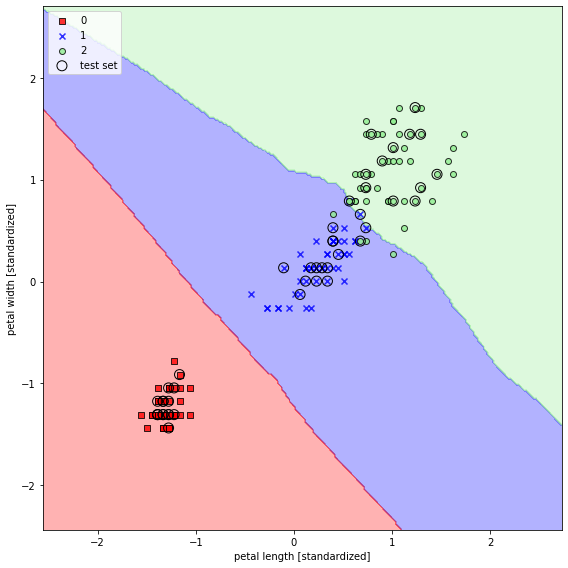

Accuracy score: 0.9777777777777777


In [17]:
knn = KNeighborsClassifier(n_neighbors=20, p=2,
                            metric='minkowski')


knn.fit(X_train_std, y_train)

plot_decision_regions(X=X_combined_std,
                        y=y_combined,
                        classifier=knn,
                        test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print(f'Accuracy score: {accuracy_score(y_test, knn.predict(X_test_std), normalize=True, sample_weight=None)}')

In [14]:
# multiple predictions of class
knn.predict(X_test_std[:3, :]).reshape(3,-1)

array([[2],
       [0],
       [0]])

In [15]:
# single prediction of class
example_index = 0
knn.predict(X_test_std[example_index, :].reshape(1, -1)) # reshape(1, -1) is equivalent to reshape(1, 2) if the vector has 2 elements

array([2])